First five rows of the dataset:
   Volume  Pressure
0      48   29.1250
1      46   30.5625
2      44   31.9375
3      42   33.5000
4      40   35.3125

Descriptive statistics:
Mean Volume: 27.12
Mean Pressure: 61.5075
Median Volume: 24.0
Median Pressure: 58.8125
Standard Deviation Volume: 11.192705958197358
Standard Deviation Pressure: 25.84054620407626


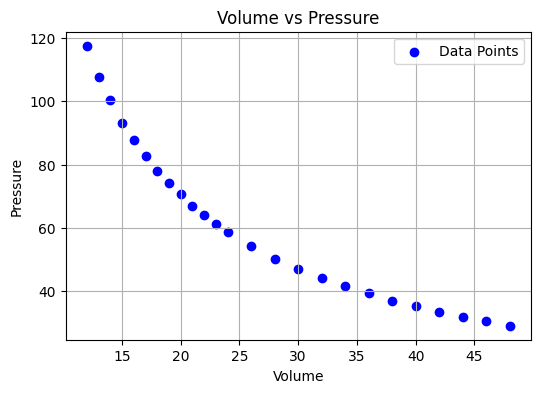

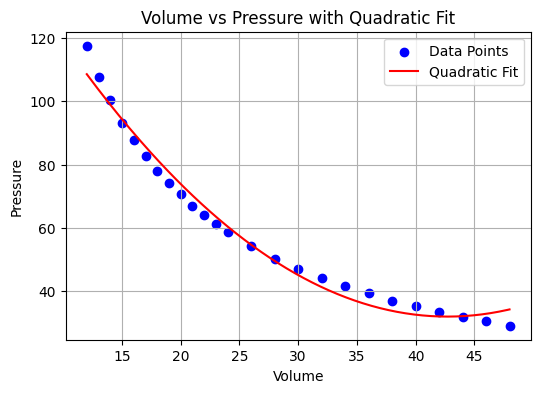


Fitted Quadratic Equation:
Pressure = 0.0811*Volume^2 + -6.9326*Volume + 180.0779
Root Mean Square Error (RMSE) of the fit: 3.2624


In [ ]:
#We can look at a CSV file to analyze data using different libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Part A: Data Import and Exploration
data = pd.read_csv("volume_pressure_data.csv")
print("First five rows of the dataset:")
print(data.head())
#Calculating basic statistics
print()
print("Descriptive statistics:")
print("Mean Volume:", data['Volume'].mean())
print("Mean Pressure:", data['Pressure'].mean())
print("Median Volume:", data['Volume'].median())
print("Median Pressure:", data['Pressure'].median())
print("Standard Deviation Volume:", data['Volume'].std())
print("Standard Deviation Pressure:", data['Pressure'].std())

#Part B: Data Visualization
plt.figure(figsize=(6, 4))
plt.scatter(data['Volume'], data['Pressure'], color='blue', label='Data Points')
plt.xlabel('Volume')
plt.ylabel('Pressure')
plt.title('Volume vs Pressure')
plt.grid(True)
plt.legend()
plt.show()

#Part C: Curve Fitting and Modeling
coefficients = np.polyfit(data['Volume'], data['Pressure'], 2)
polynomial = np.poly1d(coefficients)
x_fit = np.linspace(data['Volume'].min(), data['Volume'].max(), 200)
y_fit = polynomial(x_fit)

plt.figure(figsize=(6, 4))
plt.scatter(data['Volume'], data['Pressure'], color='blue', label='Data Points')
plt.plot(x_fit, y_fit, color='red', label='Quadratic Fit')
plt.xlabel('Volume')
plt.ylabel('Pressure')
plt.title('Volume vs Pressure with Quadratic Fit')
plt.grid(True)
plt.legend()
plt.show()

#Part D: Deriving a Mathematical Model
print()
print("Fitted Quadratic Equation:")
print(f"Pressure = {coefficients[0]:.4f}*Volume^2 + {coefficients[1]:.4f}*Volume + {coefficients[2]:.4f}")

#Part E: Error Analysis
y_pred = polynomial(data['Volume'])
rmse = np.sqrt(np.mean((data['Pressure'] - y_pred) ** 2))
print(f"Root Mean Square Error (RMSE) of the fit: {rmse:.4f}")

In [5]:
# Firstly, I will store the Cartesian coordinates for a few molecules from the CCCBDB database

molecule_H2 = {
    "H1": [0.0000, 0.0000, 0.0000],
    "H2": [0.0000, 0.0000, 0.7414]
}

molecule_H2O = {
    "H1": [0.0000, 0.7572, -0.4692],
    "H2": [0.0000, -0.7572, -0.4692],
    "O":  [0.0000, 0.0000, 0.1173]
}

molecule_benzene = {
    "C1": [0.0000, 1.3970, 0.0000],
    "C2": [1.2098, 0.6985, 0.0000],
    "C3": [1.2098, -0.6985, 0.0000],
    "C4": [0.0000, -1.3970, 0.0000],
    "C5": [-1.2098, -0.6985, 0.0000],
    "C6": [-1.2098, 0.6985, 0.0000],
    "H7": [0.0000, 2.4810, 0.0000],
    "H8": [2.1486, 1.2405, 0.0000],
    "H9": [2.1486, -1.2405, 0.0000],
    "H10": [0.0000, -2.4810, 0.0000],
    "H11": [-2.1486, -1.2405, 0.0000],
    "H12": [-2.1486, 1.2405, 0.0000]
}

print(molecule_H2, 
      molecule_H2O, 
      molecule_benzene)

{'H1': [0.0, 0.0, 0.0], 'H2': [0.0, 0.0, 0.7414]} {'H1': [0.0, 0.7572, -0.4692], 'H2': [0.0, -0.7572, -0.4692], 'O': [0.0, 0.0, 0.1173]} {'C1': [0.0, 1.397, 0.0], 'C2': [1.2098, 0.6985, 0.0], 'C3': [1.2098, -0.6985, 0.0], 'C4': [0.0, -1.397, 0.0], 'C5': [-1.2098, -0.6985, 0.0], 'C6': [-1.2098, 0.6985, 0.0], 'H7': [0.0, 2.481, 0.0], 'H8': [2.1486, 1.2405, 0.0], 'H9': [2.1486, -1.2405, 0.0], 'H10': [0.0, -2.481, 0.0], 'H11': [-2.1486, -1.2405, 0.0], 'H12': [-2.1486, 1.2405, 0.0]}


In [6]:
#We can calculate the bond length between atoms using their Cartesian coordinates.

import math

#We only want 6 values for the atoms, so we need an error if there is more/less than 6 values
input_var = input("Please enter the Cartesian coordinates of two atoms (x1 y1 z1 x2 y2 z2): ")
values = input_var.split()
if len(values) != 6:
    print("Error: Please enter exactly 6 values.")
else:
    coords1 = tuple(map(float, values[:3]))
    coords2 = tuple(map(float, values[3:]))

    def compute_bond_length(coords1, coords2):
        return math.sqrt((coords1[0] - coords2[0])**2 + (coords1[1] - coords2[1])**2 + (coords1[2] - coords2[2])**2)
    bond_length = compute_bond_length(coords1, coords2)

    if bond_length >= 2:
        print("Error: The bond length is too large to be realistic.")
    else:
        print("The length of the bonds is " + str(bond_length) + " Angstroms.")

Error: Please enter exactly 6 values.


In [7]:
#This will calculate the bond angle of three atoms using user input

import math
import numpy as np

#The dot product will calculate in radians, so we need some extra steps to get it in degrees
def compute_bond_angle(coord1, coord2, coord3):
    vector1 = coord1 - coord2
    vector2 = coord3 - coord2
    dot_product = np.dot(vector1, vector2)
    norm1 = np.linalg.norm(vector1)
    norm2 = np.linalg.norm(vector2)
    if norm1 == 0 or norm2 == 0:
        return None
    cos_angle = dot_product / (norm1 * norm2)
    angle_rad = np.arccos(cos_angle)
    angle_deg = np.degrees(angle_rad)
    return angle_deg

#We need user input for the coordinates in the bond angle
input_str = input("Enter coordinates for three atoms (x1 y1 z1 x2 y2 z2 x3 y3 z3): ")
values = list(map(float, input_str.split()))
if len(values) != 9:
    print("Error: Please enter exactly 9 values.")
else:
    coord1 = np.array(values[0:3])
    coord2 = np.array(values[3:6])
    coord3 = np.array(values[6:9])
    angle = compute_bond_angle(coord1, coord2, coord3)
    print(f"Bond angle: {angle} degrees")
    if angle < 90:
        print("The bond angle is acute.")
    elif angle == 90:
        print("The bond angle is right.")
    else:
        print("The bond angle is obtuse.")

Error: Please enter exactly 9 values.


In [8]:
#Now we can automatically calculate all bond lengths in a given molecule by calling on the compute_bond_lengths function

import math
import numpy as np

#To start, this is the compute_bond_lengths function that I wrote earlier in this code
def compute_bond_length(coords1, coords2):
    return math.sqrt((coords1[0] - coords2[0])**2 + (coords1[1] - coords2[1])**2 + (coords1[2] - coords2[2])**2)

#Now, we need to create a function that can sort all the coordinates into a list that we can use
def coord_sorter(input_str):
    coords = input_str.split()
    if len(coords) % 4 != 0:
        print("Error: Each atom should be listed with a unique ID and its x, y, z coordinates.")
        return None
    molecule = {}
    for x in range(0, len(coords), 4):
        label = coords[x]
        coord_list = np.array(list(map(float, coords[x+1:x+4])))
        molecule[label] = coord_list
    return molecule

#And now, we can sort through the list of coordinates to calculate each unique bond length using nested loops
def calculate_all_bond_lengths(molecule):
    atom_labels = list(molecule.keys())
    n = len(atom_labels)
    for i in range(n):
        for j in range(i + 1, n):
            atom1 = atom_labels[i]
            atom2 = atom_labels[j]
            bond_length = compute_bond_length(molecule[atom1], molecule[atom2])
            print(f"Bond length between {atom1} and {atom2}: {bond_length:.2f} Angstroms")

#And finally, just adding an input for the user to enter their own coordinates
input_str = input("Enter atom coordinates: ")
molecule = coord_sorter(input_str)
if molecule:
    calculate_all_bond_lengths(molecule)

In [9]:
#We can also automatically calculate the bond angles of inputted coordinates

import math
import numpy as np

#The compute_bond_angle function is coming back for round two
def compute_bond_angle(coord1, coord2, coord3):
    vector1 = coord1 - coord2
    vector2 = coord3 - coord2
    dot_product = np.dot(vector1, vector2)
    norm1 = np.linalg.norm(vector1)
    norm2 = np.linalg.norm(vector2)
    if norm1 == 0 or norm2 == 0:
        return None
    cos_angle = dot_product / (norm1 * norm2)
    angle_rad = np.arccos(cos_angle)
    angle_deg = np.degrees(angle_rad)
    return angle_deg

#We can reuse the exact same coordinate sorter as before
def coord_sorter(input_str):
    coords = input_str.split()
    if len(coords) % 4 != 0:
        print("Error: Each atom should be listed with a unique ID and its x, y, z coordinates.")
        return None
    molecule = {}
    for x in range(0, len(coords), 4):
        label = coords[x]
        coord_list = np.array(list(map(float, coords[x+1:x+4])))
        molecule[label] = coord_list
    return molecule

#Most of the code can be the same, but we need to add another loop to account for the third set of coordinates
def calculate_all_bond_angles(molecule):
    atom_labels = list(molecule.keys())
    n = len(atom_labels)
    for i in range(n):
        for j in range(i + 1, n):
            for k in range(j + 1, n):
                atom1 = atom_labels[i]
                atom2 = atom_labels[j]
                atom3 = atom_labels[k]
                bond_angle = compute_bond_angle(molecule[atom1], molecule[atom2], molecule[atom3])
                if bond_angle is None:
                    print(f"Cannot calculate bond angle for {atom1}, {atom2}, {atom3}. (Vector is zero-length)")
                elif abs(bond_angle - 90) < 1e-2:
                    print("The bond angle is right.")
                elif bond_angle < 90:
                    print("The bond angle is acute.")
                elif bond_angle < 180:
                    print("The bond angle is obtuse.")
                else:
                    print("The bond angle is too large.")
                print(f"Bond angle between {atom1}, {atom2}, and {atom3}: {bond_angle:.2f} degrees")
                print()

#And again, we just need the user to input whatever coordinates they want
input_str = input("Enter atom coordinates: ")
molecule = coord_sorter(input_str)
if molecule:
    calculate_all_bond_angles(molecule)